In [322]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import matplotlib.animation as animation
from IPython.display import HTML

In [323]:
df = pd.read_csv('D:\桌面\PycharmProjects\动态可视化代码\确诊资料.csv', encoding='GBK',
                 usecols=['name', 'group', 'year', 'value'])
df.head(5)

,name,group,year,value
0,武汉市,武汉市,1月23日,495
1,孝感市,孝感市,1月23日,22
2,黄冈市,黄冈市,1月23日,12
3,荆州市,荆州市,1月23日,8
4,荆门市,荆门市,1月23日,8


In [324]:
current_year = '2月1日'
dff = (df[df['year'].eq(current_year)]
       .sort_values(by='value', ascending=True)
       .head(10))
dff

,name,group,year,value
152,神农架林区,神农架林区,2月1日,7
151,潜江市,潜江市,2月1日,35
150,天门市,天门市,2月1日,99
148,恩施州,恩施州,2月1日,105
149,仙桃市,仙桃市,2月1日,140
138,十堰市,十堰市,2月1日,212
146,咸宁市,咸宁市,2月1日,246
137,黄石市,黄石市,2月1日,252
143,鄂州市,鄂州市,2月1日,278
142,荆门市,荆门市,2月1日,329


<BarContainer object of 10 artists>

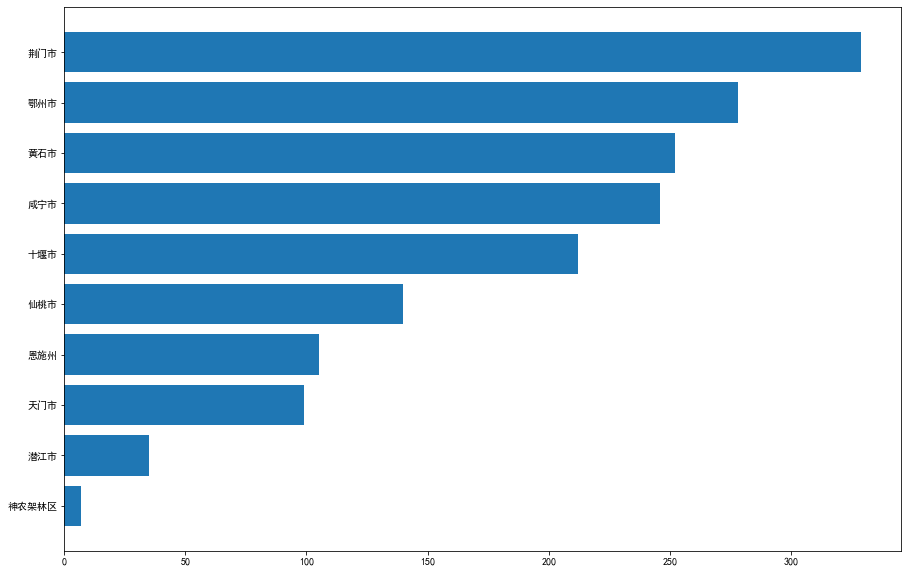

In [325]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(dff['name'], dff['value'])

In [326]:
colors = dict(zip(
    ['武汉市', '孝感市', '黄冈市', '荆州市',
     '荆门市', '仙桃市', '宜昌市', 
     '黄石市', '十堰市', '襄阳市', '咸宁市', '随州市', '恩施州', '天门市', '潜江市', '神农架林区', '鄂州市'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50', 
     '#eb4310', '#fbb417', '#cdd541', '#3f9337', '#239676', '#1f9baa', '#3366cc', '#bd2158', '#003366', '#0080ff']
))
group_lk = df.set_index('name')['group'].to_dict()

Text(1, 0.4, '2月1日')

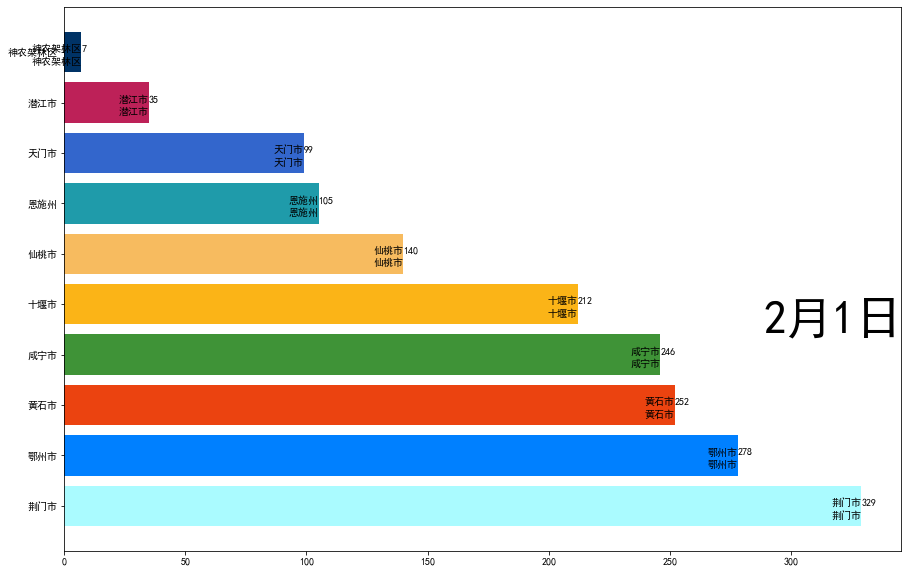

In [327]:
fig, ax = plt.subplots(figsize=(15, 10))
dff = dff[::-1]   # 从上到下翻转值
# 将颜色值传递给`color=`
ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
# 遍历这些值来绘制标签和值(Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: 名字
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: 组名
    ax.text(value, i,     value,           ha='left')   # 38194.2: 值
# 在画布右方添加年份
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

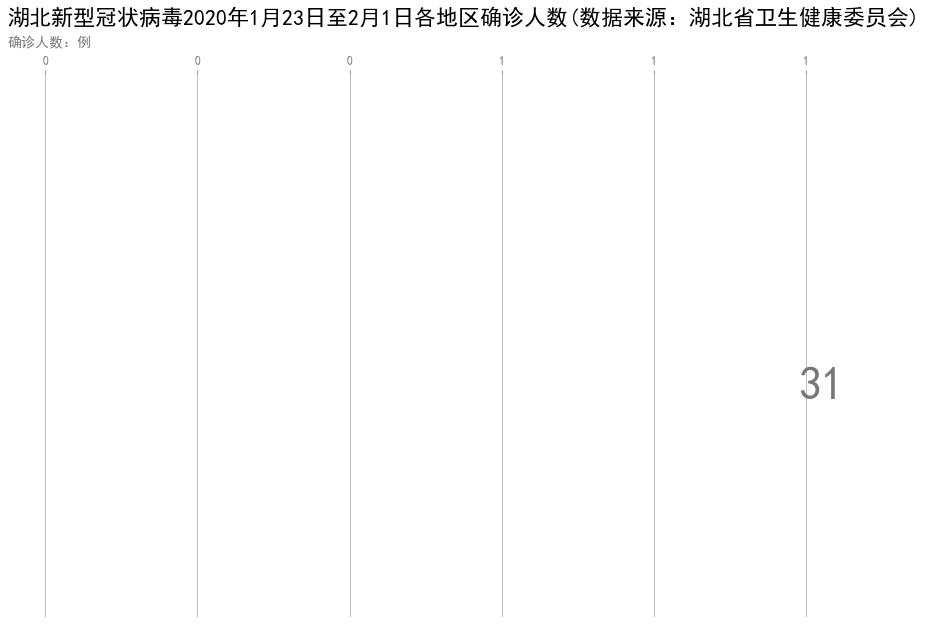

In [328]:
fig, ax = plt.subplots(figsize=(15, 10))
def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['name'], dff['value'], color=[colors[group_lk[x]] for x in dff['name']])
    #dx = dff['value'].max() / 200
    dx = dff['value'].max()/ 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['name'])):
        ax.text(0, i,     name,           size=16, weight=600, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=16, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.05, '确诊人数：例', transform=ax.transAxes, size=14, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.09, '湖北新型冠状病毒2020年1月23日至2月1日各地区确诊人数(数据来源：湖北省卫生健康委员会)',
            transform=ax.transAxes, size=22, weight=600, ha='left')
#     ax.text(1, 0, 'by QIML', transform=ax.transAxes, ha='right',
#             color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(31)

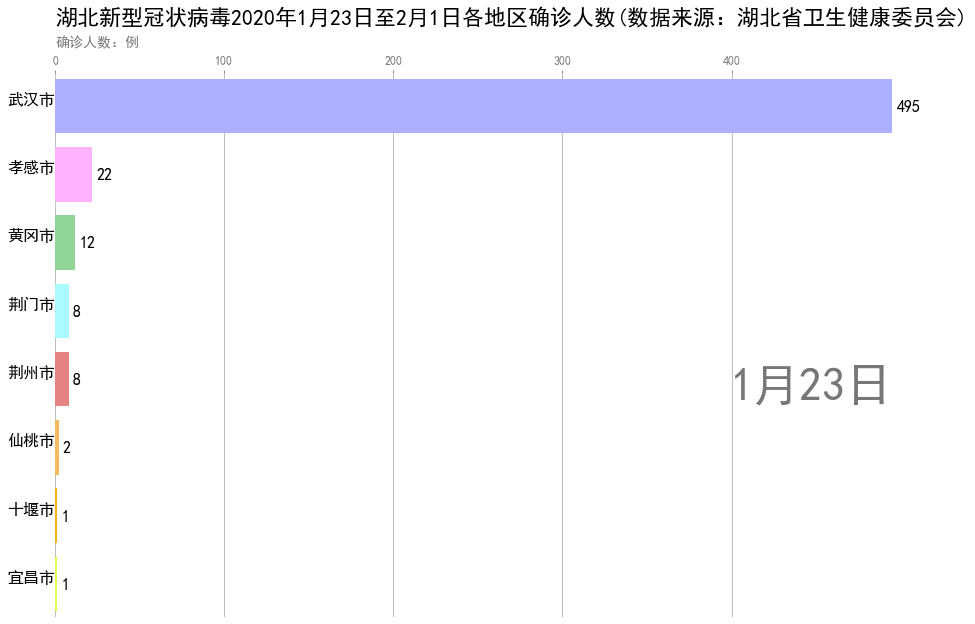

In [329]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 10))
#animator = animation.FuncAnimation(fig, draw_barchart, frames=range(23, 32))
list = ['1月23日','1月24日','1月25日','1月26日','1月27日','1月28日','1月29日','1月30日','1月31日','2月1日']
animator = animation.FuncAnimation(fig, draw_barchart, frames=list)
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()

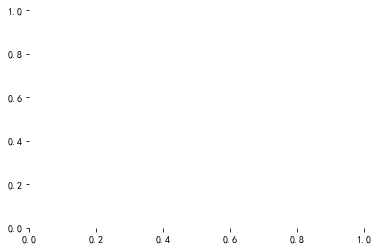

In [330]:
animator.to_html5_video()
#animator.save('确诊人数333.gif', writer='imagemagick', fps=1, dpi=100)
#animator.save('确诊人数333.mp4', fps=1, dpi=100)
animator.save('确诊人数999.mp4')